<a href="https://colab.research.google.com/github/Krushikkk/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Bike Sharing Demand Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -**Krushik Kalavadiya
##### **Team Member 2 -**Kishan Hirapara


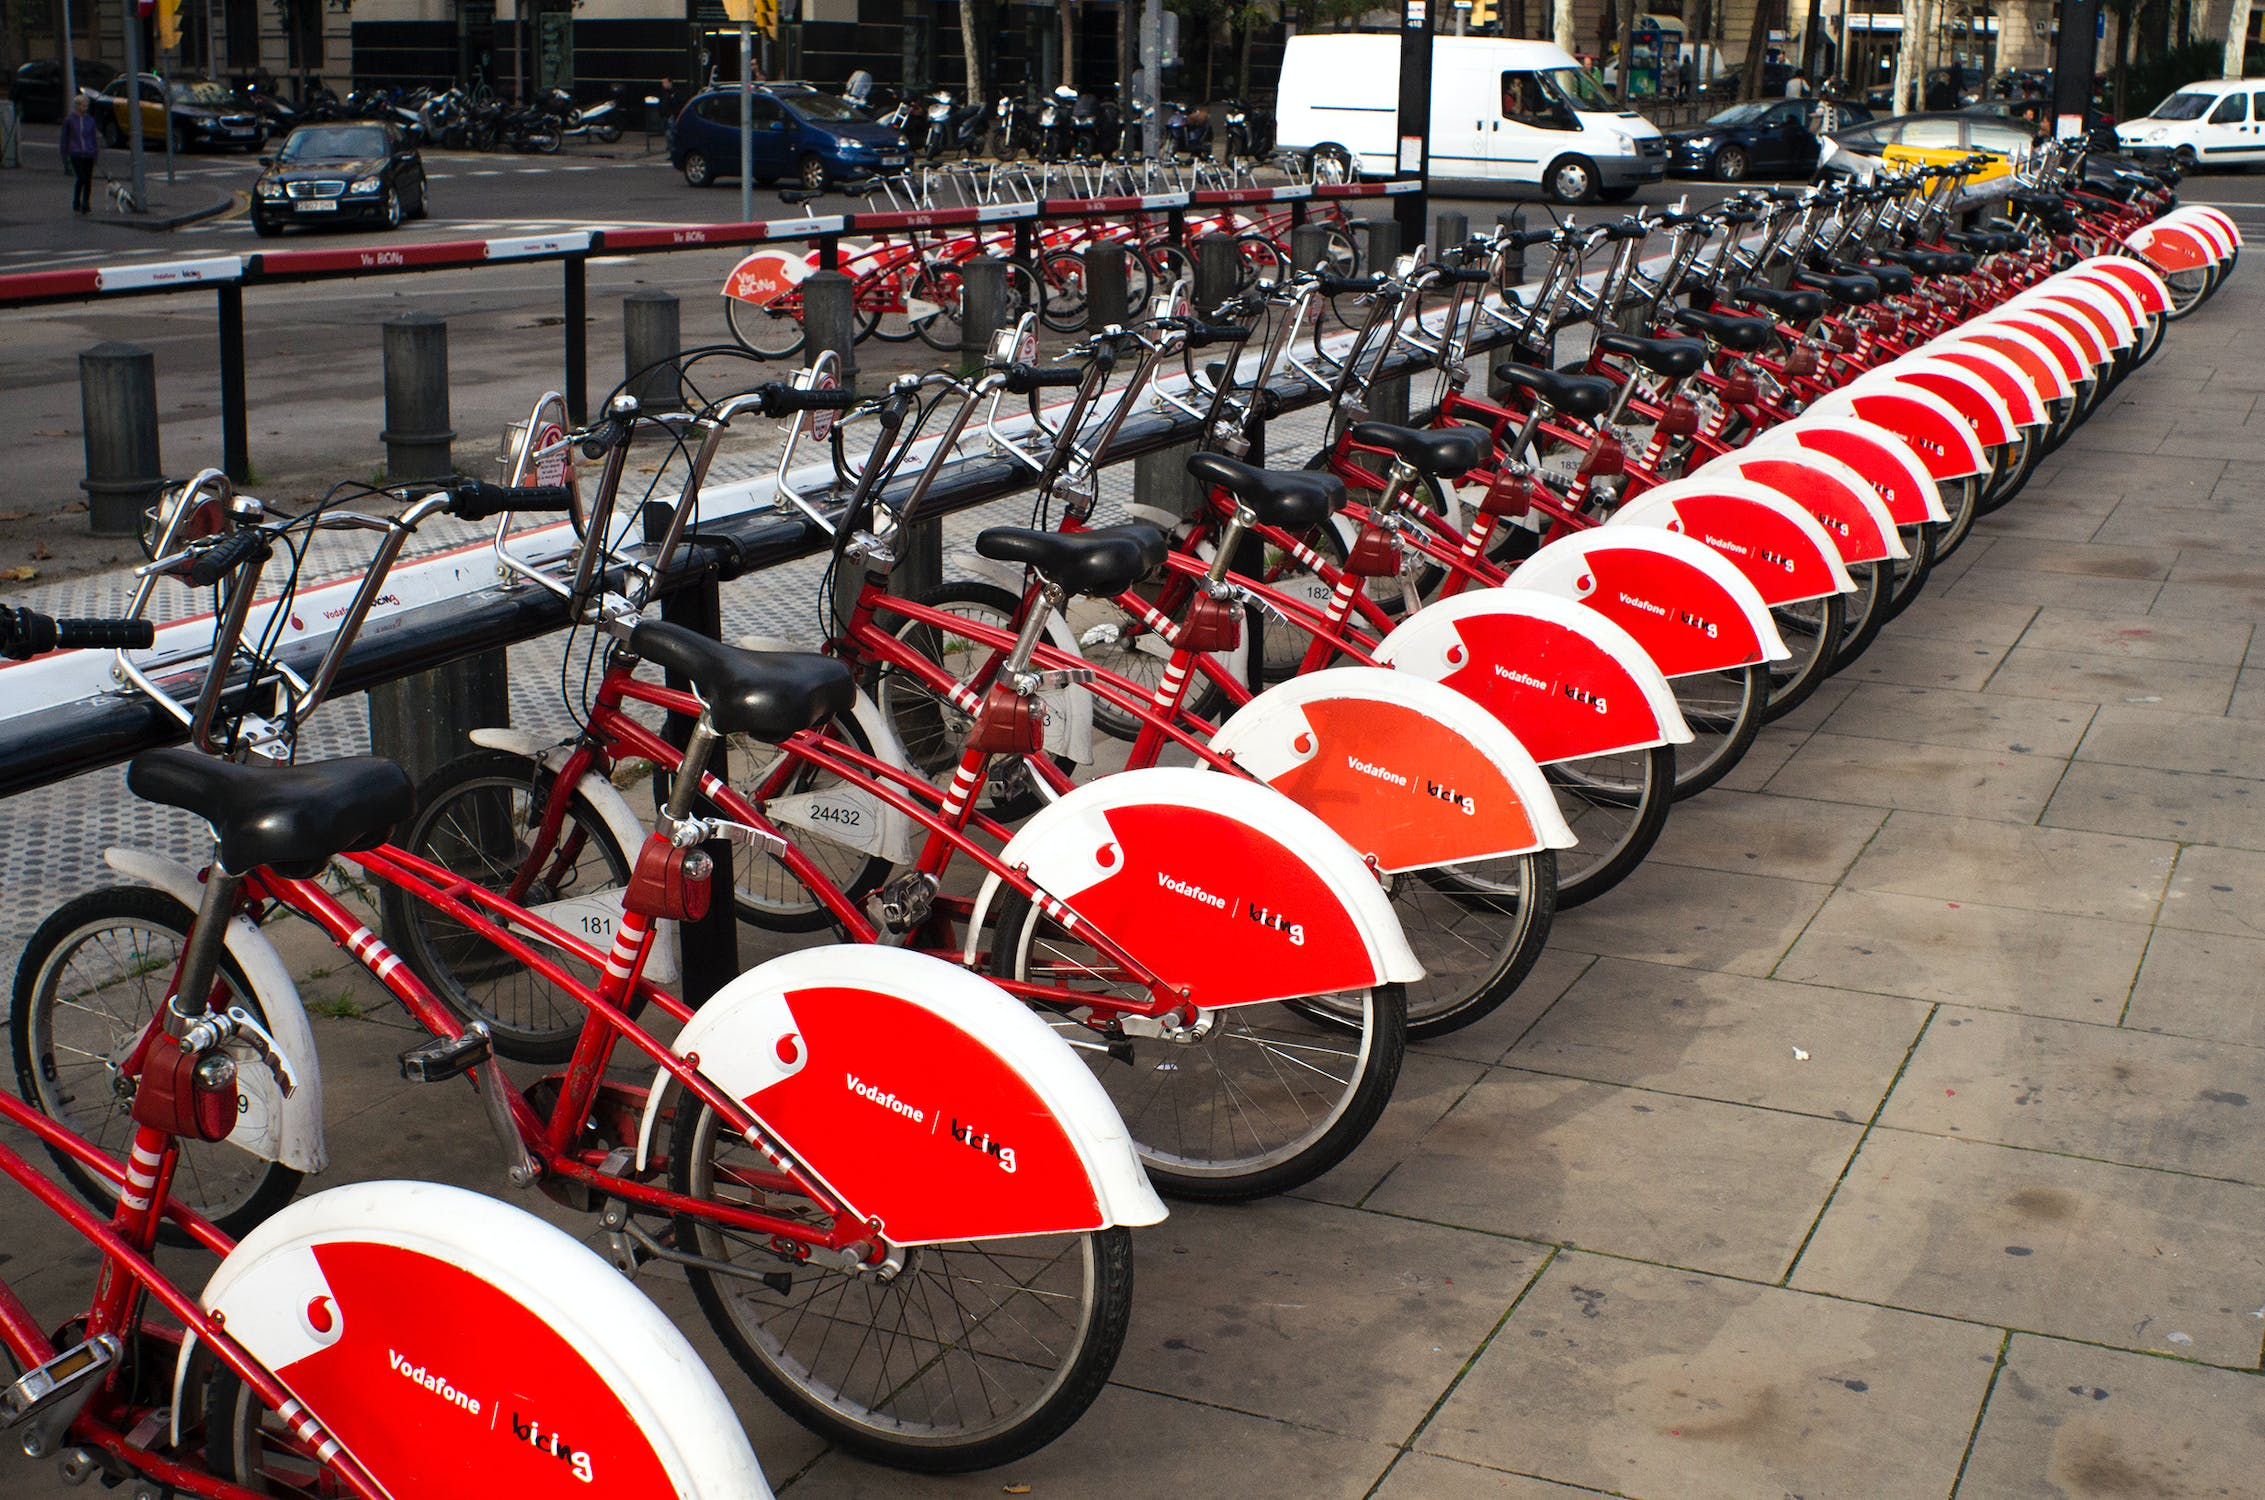

# **Project Summary -**

**1) Introduction :**

Bike sharing is a transportation system that allows individuals to rent bicycles on a short-term basis, typically for a few hours or even minutes, and return them to designated locations. Bike sharing programs have gained popularity in cities around the world as a way to promote sustainable and affordable transportation options, while also reducing traffic congestion and carbon emissions. The demand for bike sharing services has been driven by factors such as increased awareness of environmental issues, rising urbanization, and the need for efficient and affordable transportation options. The growth of bike sharing has also been facilitated by advances in technology, which have enabled bike sharing operators to offer convenient mobile applications and user-friendly interfaces. And we have a bike sharing dataset of Seoul, South Korea.

**2) Objective :**

 The main objective is to build a predictive model, which could help to train a model to predict the number of bike rentals of the year given the weather conditions.  As a result, this would enable swift and effective predictions.

**3) Approach :** 

1. Know the dataset
2. Understanding Your Variables
3. Data wrangling
4. EDA
5. Hypothesis testing
6. Feature Engineering & Data Pre-processing
7. ML model implementation 

   Linear regression

   Random Forest Classifier

   XG Boost Classifier
8. Conclusion
   

# **GitHub Link -**

https://github.com/Krushikkk/Bike-Sharing-Demand-Prediction

# **Problem Statement**


**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort.It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time.Eventually, providing the city with a stable supply of rental bikes becomes a major concern.The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Data manipulation and visualization libraries
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from seaborn.rcmod import set_style
sns.set_theme(style='whitegrid', palette='magma_r')

# Date/time manipulation libraries
import datetime as dt
from datetime import datetime

# Statistical modeling libraries
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

# Data preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Model selection and evaluation libraries
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import mean_absolute_error

# Miscellaneous libraries
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Reading the dataset
df_original = pd.read_csv('//content/drive/MyDrive/Colab Notebooks/Almabetter Submission File Regression/SeoulBikeData.csv', encoding='latin1')

In [ ]:
# Copying data to preserve orignal file
df = df_original.copy()

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

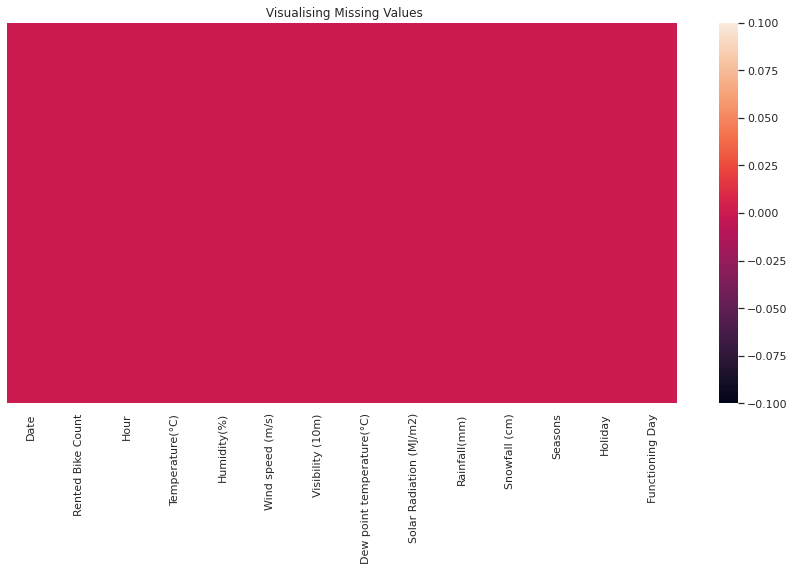

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(), annot=False, yticklabels=False)
plt.title(" Visualising Missing Values")

### What did you know about your dataset?

The dataset contains 8760 rows and 14 columns, and no null or duplicate values were found in the dataset. Specifically, there are 6 float-type data columns, 4 integer-type data columns, and 4 object-type data columns in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description 

 The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


* **Date** - date-month-year
* **Rented Bike count** - Count of bikes rented at each hour
* **Hour** - Hour of day
* **Temperature** -Temperature in Celsius
* **Humidity** - % of Humidity in environment
* **Windspeed** - Wind Spped in m/s
* **Visibility** - Visibility 10m
* **Dew point temperature** - Celsius
* **Solar radiation** - Solar Radiation in MJ/m2
* **Rainfall** - Rainfall in mm
* **Snowfall** - Snowfall in cm
* **Seasons** - Winter, Spring, Summer, Autumn
* **Holiday** - Holiday/No holiday
* **Functional Day** - No(Non Functional Hours), Yes(Functional hours)



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Rename columns
df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity',
                      'Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature',
                      'Solar Radiation (MJ/m2)':'Solar_Radiation','Rainfall(mm)':'Rainfall',
                      'Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'})

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [ ]:
# Changing date feature into two diffrent feature Day, Month.
df['Date'] = pd.to_datetime(df['Date'])

df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

# We dont want each day name so we converted it into binary class as Weekdays = 0 & Weekend 1.
df['weekdays_weekend']=df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

# Droping unnecessary columns.
# Year basically contains details from 2017 december to 2018 november so we considers this is one year.
df=df.drop(columns=['Date','day'],axis=1)

In [ ]:
df['weekdays_weekend'].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

In [ ]:
# Change data type to category
cols=['Hour','month','weekdays_weekend']
for col in cols:
  df[col]=df[col].astype('category')

### What all manipulations have you done and insights you found?

To prepare the dataset for further analysis and modeling, we first renamed some column names to improve clarity and consistency. After that, we created new columns called 'weekdays_weekend', 'month', and 'day' by using the 'Date' column. Finally, we dropped the unnecessary 'Date' and 'day' columns from the dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

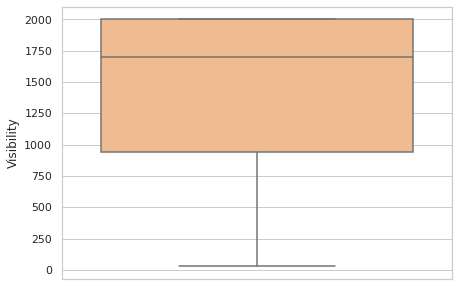

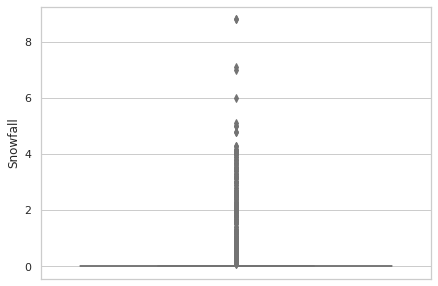

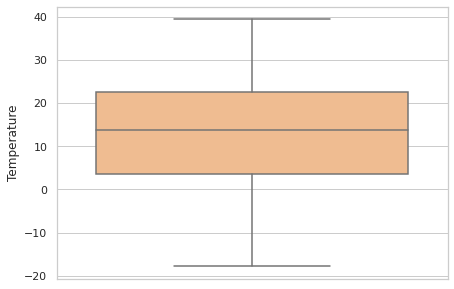

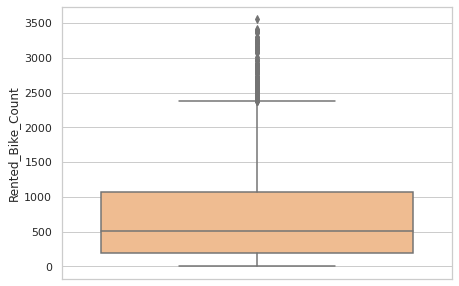

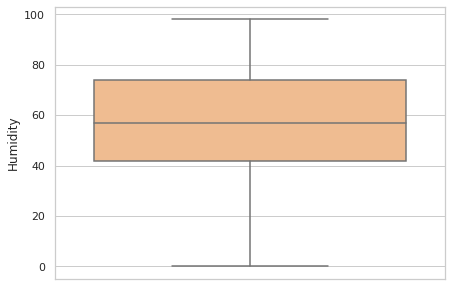

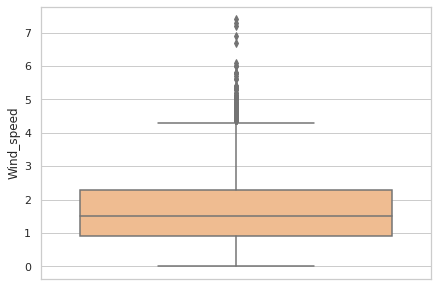

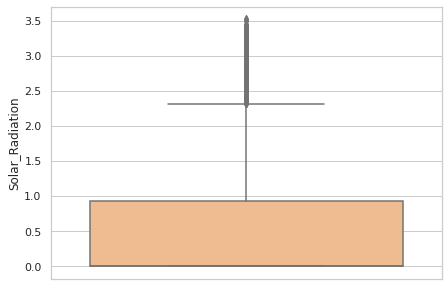

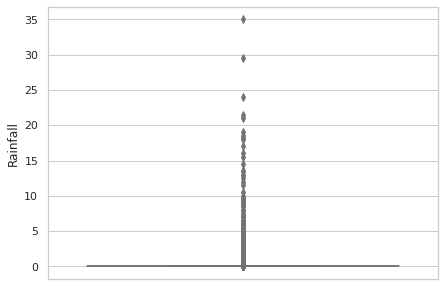

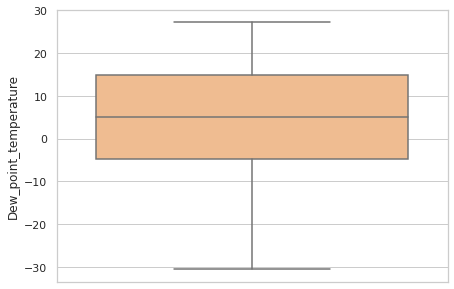

In [ ]:
# Chart - 1 visualization code
#Univariant Analysis

num_var = list(set(df.describe()))
for i in num_var:
    plt.figure(figsize=(7,5))  
    sns.boxplot(y = df[i])
    plt.show()

##### 1. Why did you pick the specific chart?

we picked the boxplot chart because it is a good way to visualize the distribution of numerical data. The boxplot also shows the quartiles, minimum and maximum values, and any outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

Humidity, Temperature, Dew Point Temperature and Visibility are in Range, there are no outliers.

But Solar radiation and Wind speed have some outlier.And Snowfall and Rainfall have no specific range, they are almost zero but there are outliers too. And rental bike count has also some outliers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Solar Radiation and Wind Speed have some outliers means these two things are changing sometime out of the range.

Snowfall and Rainfall are always zero but outliers shows that many times Snowfall and Rainfall occurs with no specific range.

Outliers in bike rental counts means sometimes rental counts are varies.

However, the presence of outliers in some variables, such as solar radiation and wind speed, could lead to negative growth if not managed carefully. Outliers can skew the data and lead to inaccurate predictions, which could result in oversupply or undersupply of bikes. Therefore, it is important to identify and manage outliers in these variables to ensure accurate predictions and optimize business operations.

#### Chart - 2

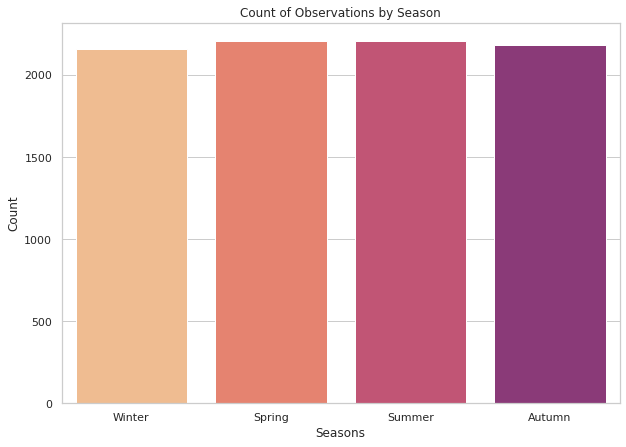

In [ ]:
# Chart - 2 visualization code

plt.figure(figsize=(10,7))
sns.countplot(x='Seasons', data=df)
plt.title('Count of Observations by Season')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

To determine the total number of observations by season.

##### 2. What is/are the insight(s) found from the chart?

All seasons have nearly the same number of observations.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that all seasons have nearly the same number of observations may not directly lead to a positive or negative impact on business growth. However, this information can help businesses plan and allocate resources more effectively throughout the year, without having to worry about significant seasonal variations in data availability.

#### Chart - 3

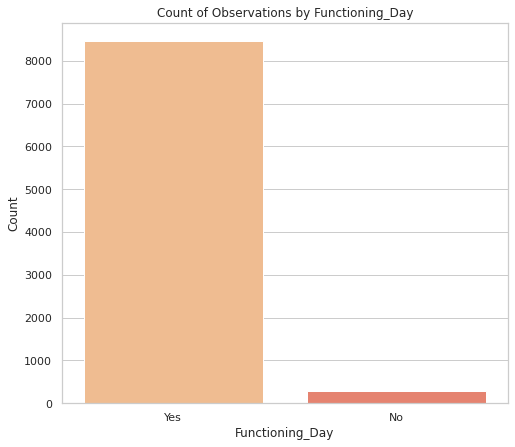

In [ ]:
# Chart - 3 visualization code

plt.figure(figsize=(8,7))
sns.countplot(x='Functioning_Day', data=df)
plt.title('Count of Observations by Functioning_Day')
plt.xlabel('Functioning_Day')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

To determine the number of observations based on whether it was a functioning day or not.

##### 2. What is/are the insight(s) found from the chart?

Almost all days are functioning, there are very few non-functioning days.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are more than 95% funtioning days observation,so Bike rental servise should be according to funtioning days in campare to non functioning day.

The insight that almost all days are functioning and there are very few non-functioning days can have a positive impact on business operations. This information can help bike rental companies to plan their inventory and resources accordingly, as they can expect a consistent demand for their services throughout the week.

However, if the bike rental companies do not manage their inventory and resources effectively during non-functioning days, they may experience negative growth. For example, if they oversupply bikes on non-functioning days and there is not enough demand, they may have to bear the cost of unused inventory. On the other hand, if they undersupply bikes on non-functioning days and there is unexpected demand, they may lose out on potential revenue. Therefore, it is important to use this insight to optimize business operations and avoid oversupply or undersupply of bikes.

#### Chart - 4

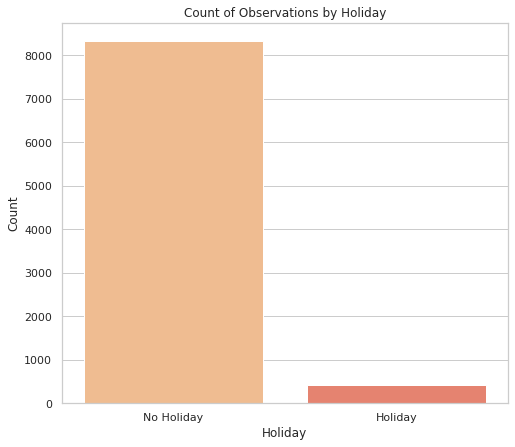

In [ ]:
# Chart - 4 visualization code

plt.figure(figsize=(8,7))
sns.countplot(x='Holiday', data=df)
plt.title('Count of Observations by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

To determine the number of observations by holiday and non-holiday.

##### 2. What is/are the insight(s) found from the chart?

There are more observations on non-holidays compared to holidays.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that there are more observations on non-holidays compared to holidays can help create a positive business impact for bike rental companies. This information can be used to adjust inventory levels and staffing during peak periods, which can increase operational efficiency and customer satisfaction.

However, there is a possibility that oversupply or undersupply of bikes can occur during holidays if not managed carefully. This could lead to negative growth and potential revenue loss. Therefore, it is important to carefully analyze demand patterns during holidays and adjust inventory levels accordingly to ensure optimal business operations.

#### Chart - 5

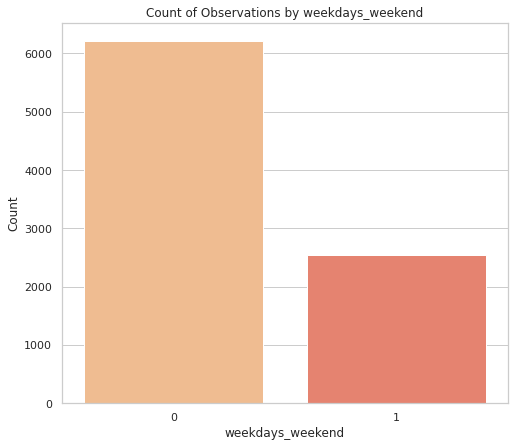

In [ ]:
# Chart - 5 visualization code

plt.figure(figsize=(8,7))
sns.countplot(x='weekdays_weekend', data=df)
plt.title('Count of Observations by weekdays_weekend')
plt.xlabel('weekdays_weekend')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

To know the count of observations by weekdays and weekends.

##### 2. What is/are the insight(s) found from the chart?

Based on the chart, we can observe that there are more observations on weekdays compared to weekends.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that there are more observations on weekdays compared to weekends can help bike rental companies in managing their inventory and staff resources accordingly. They can allocate more bikes and staff during peak weekday hours to meet the demand and optimize their operations.

On the other hand, if the company focuses only on weekdays and neglects weekends, they may miss out on potential business opportunities. While the demand may not be as high as weekdays, weekends still have a significant number of observations and can generate revenue for the company.

Therefore, it is important to strike a balance between weekday and weekend operations to ensure optimal utilization of resources and maximize revenue.

#### Chart - 6

[Text(0.5, 1.0, 'Count of Rented bikes based on Seasons per Hour ')]

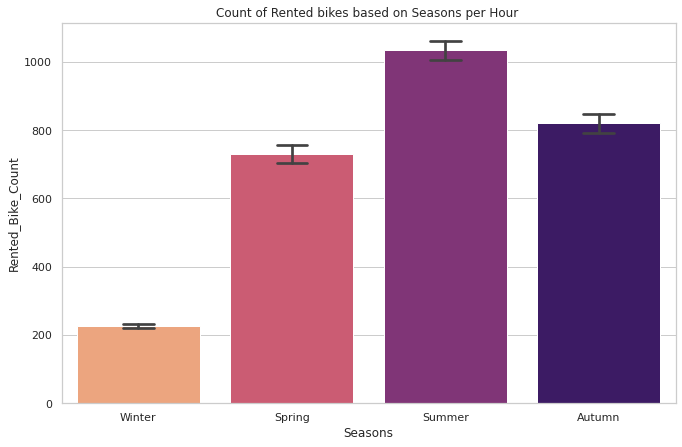

In [ ]:
# Chart - 6 visualization code

fig,ax = plt.subplots(figsize=(11,7))
sns.barplot(data=df, x='Seasons', y='Rented_Bike_Count', ax=ax, capsize=.2, palette = 'magma_r')
ax.set(title='Count of Rented bikes based on Seasons per Hour ')

##### 1. Why did you pick the specific chart?

To check the bike rental count per hour according to season.

##### 2. What is/are the insight(s) found from the chart?

During the summer season, there is an average bike rental count of 1000 bikes per hour, which is higher than the autumn and spring seasons where the average bike rental counts are 800 and 700, respectively. However, during the winter season, there is a significantly lower bike rental count with an average of only 200 bikes per hour.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can definitely help create a positive business impact. By understanding the seasonal trends in bike rental counts, the business can plan ahead and optimize their resources accordingly. For example, during the summer season where the demand for bikes is higher, the business can ensure that they have enough bikes in stock and have more staff available to handle the increased demand.

However, there is a potential negative impact if the business does not plan accordingly for the lower bike rental counts during the winter season. They may end up with excess inventory and not enough demand, which could result in financial losses. Therefore, it is important for the business to use these insights to make informed decisions and adapt to the seasonal trends in bike rental counts.

#### Chart - 7

[Text(0.5, 1.0, 'Count of Rented bikes based on hour ')]

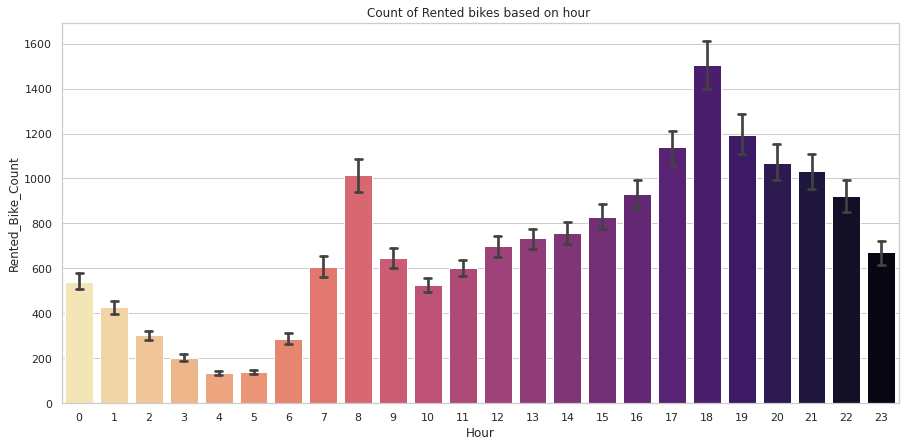

In [ ]:
# Chart - 7 visualization code

fig,ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df, x='Hour', y='Rented_Bike_Count', ax=ax, capsize=.2, palette = "magma_r")
ax.set(title='Count of Rented bikes based on hour ')

##### 1. Why did you pick the specific chart?

To determine the hourly bike count, which hours have more or less bike count.

##### 2. What is/are the insight(s) found from the chart?

The bike rental count is 600 or more during the hours of 7 to 9 and 16 to 22.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The bike rental count is higher between 7 to 9 o'clock in the morning as many people are commuting to work during this time. Similarly, between 16 to 22 o'clock, the bike rental count is also high as people are returning from work and some may prefer to use bikes for recreational purposes during this time. To ensure customer satisfaction, the service provider should keep in mind these peak hours and make sure to have more bikes available during these periods. This will help meet the demand of customers and provide a better overall service.

#### Chart - 8

[Text(0.5, 1.0, 'Count of Rented bikes based on Month ')]

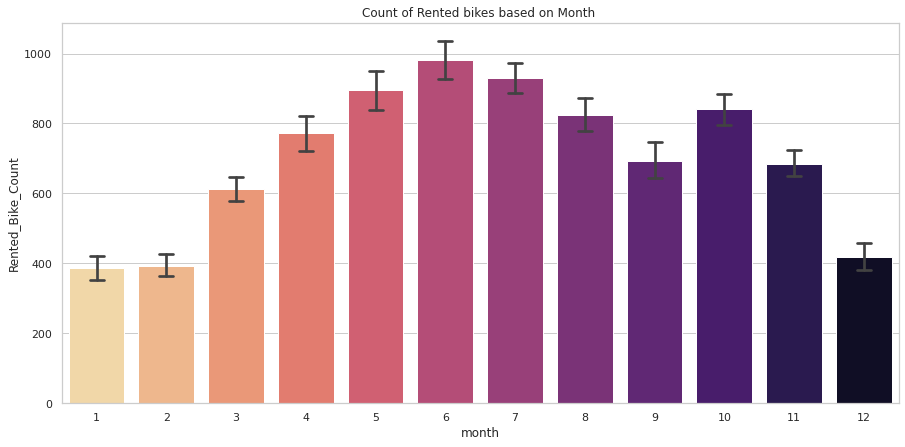

In [ ]:
# Chart - 8 visualization code

fig,ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df, x='month', y='Rented_Bike_Count', ax=ax, capsize=.2, palette = "magma_r")
ax.set(title='Count of Rented bikes based on Month ')

##### 1. Why did you pick the specific chart?

To check monthly average bike count.

##### 2. What is/are the insight(s) found from the chart?

During the months of April to August (4th to 8th months) and October, there are typically high bike rentals with more than 750 bike rentals per hour. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

During the months of April to August (4th to 8th months) and October, there are typically high bike rentals with more than 750 bike rentals per hour. By keeping track of these peak periods of demand, the service provider can ensure that there are enough bikes available to meet customer needs and provide a high level of service.

#### Chart - 9

[Text(0.5, 1.0, 'Count of Rented bikes based on  Holiday ')]

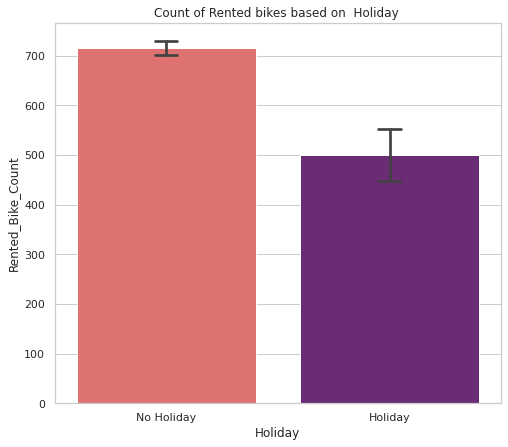

In [ ]:
# Chart - 9 visualization code

fig,ax = plt.subplots(figsize=(8,7))
sns.barplot(data=df, x='Holiday', y='Rented_Bike_Count', ax=ax, capsize=.1, palette = "magma_r")
ax.set(title='Count of Rented bikes based on  Holiday ')

##### 1. Why did you pick the specific chart?

To know the bike rental count on holidays and non-holidays.

##### 2. What is/are the insight(s) found from the chart?

There are more bike rental counts during non-holidays compared to holidays.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that there are more bike rental counts during non-holidays compared to holidays could potentially help create a positive business impact. This information could be used to adjust the bike rental inventory and staffing levels to better match the demand on both non-holidays and holidays. By doing so, the business could optimize its resources and potentially increase revenue and customer satisfaction by ensuring that there are enough bikes available during high-demand periods. Additionally, the business could use this information to promote bike rentals during holidays and potentially increase the number of rentals during those times, further boosting revenue.

#### Chart - 10

[Text(0.5, 1.0, 'Count of Rented bikes based on Functioning_Day ')]

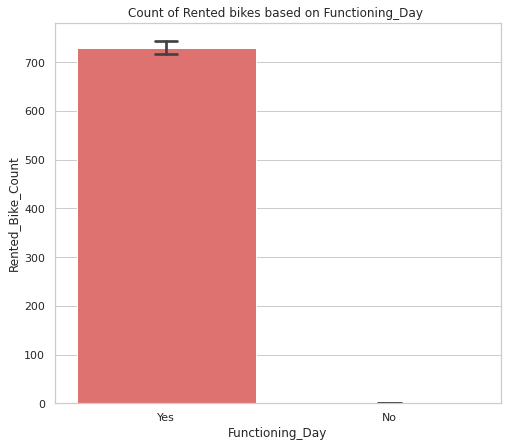

In [ ]:
# Chart - 10 visualization code

fig,ax = plt.subplots(figsize=(8,7))
sns.barplot(data=df, x='Functioning_Day', y='Rented_Bike_Count', ax=ax, capsize=.1, palette = "magma_r")
ax.set(title='Count of Rented bikes based on Functioning_Day ')

##### 1. Why did you pick the specific chart?

To know about bike rental count on functioning and non-functioning days.

##### 2. What is/are the insight(s) found from the chart?

There is a significant difference in the bike rental count between functioning and non-functioning days. On functioning days, people prefer to rent a bike, while on non-functioning days, the bike rental count is too low or close to zero.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

According to the chart, the bike rental count on functioning days is more than 700 rented bikes per hour, while on non-functioning days, it is usually in the single digits per hour. Therefore, making more bikes available on functioning days could lead to more profit.

Additionally, non-functioning days could be a good time for bike servicing since there are very few rentals on those days.

Yes, the insights gained from the bike rental count analysis could help create a positive business impact. By increasing the number of bikes available on functioning days, the business can potentially increase its revenue. Furthermore, by using non-functioning days for bike servicing, the business can ensure that the bikes are in good condition and ready for rental on functioning days.

#### Chart - 11

[Text(0.5, 1.0, 'Count of Rented bikes based on weekdays_weekend ')]

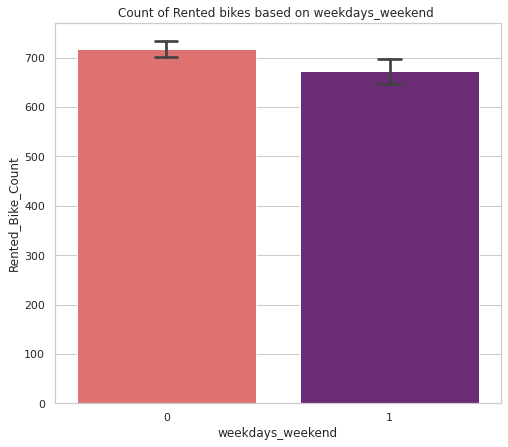

In [ ]:
# Chart - 11 visualization code

fig,ax = plt.subplots(figsize=(8,7))
sns.barplot(data=df, x='weekdays_weekend', y='Rented_Bike_Count', ax=ax, capsize=.1, palette = "magma_r")
ax.set(title='Count of Rented bikes based on weekdays_weekend ')

##### 1. Why did you pick the specific chart?

To know about Bike rental count on weekdays and weekends.

##### 2. What is/are the insight(s) found from the chart?

There is not much difference in bike rental count between weekdays and weekends, with approximately 50 fewer bike rentals on weekends compared to weekdays.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The service provider has to keep in mind to maintain the same availability of bikes on weekdays and weekends. This information could be used to adjust the bike rental inventory and staffing levels to better match the demand on both weekdays and weekends, potentially increasing revenue and customer satisfaction.

#### Chart - 12

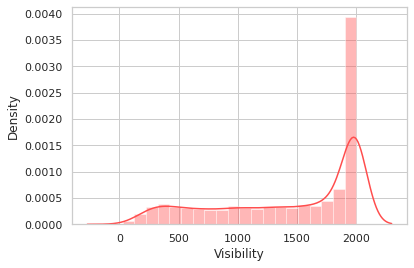

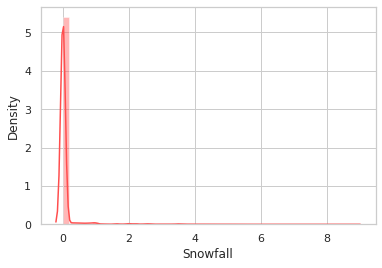

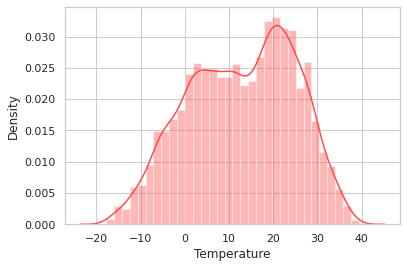

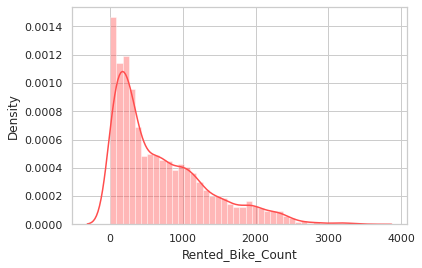

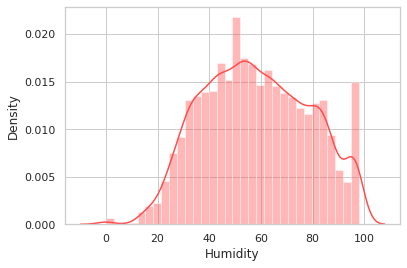

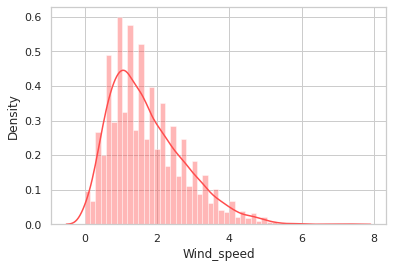

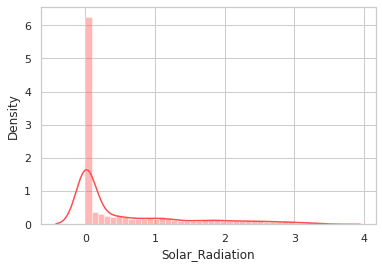

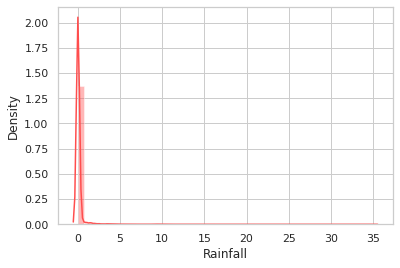

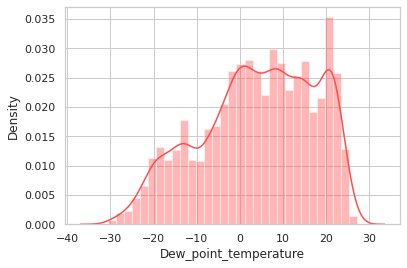

In [ ]:
# Chart - 12 visualization code
# Assigning numerical coulmn to variable
num_feat = list(set(df.describe()))
num_feat

for col in num_feat:
  plt.figure(figsize=(6,4))
  sns.distplot(x=df[col], color = '#ff4d4d')
  plt.xlabel(col)
  plt.show()

##### 1. Why did you pick the specific chart?

To Check the distribution of the variables.

##### 2. What is/are the insight(s) found from the chart?

According to the above charts, Humidity, Temperature, and Dew Point Temperature are normally distributed, Wind Speed is right-skewed, and Visibility is left-skewed. 
The Rental Bike Count is also right-skewed distributed, indicating that the bike rental count is mostly between 0 to 1000.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights about the distribution of the weather variables and rental bike count can potentially help in creating a positive business impact. By understanding the patterns and trends of the weather variables, bike rental companies can adjust their inventory and staffing levels accordingly to better meet the demand of their customers, potentially increasing revenue and customer satisfaction.

#### Chart - 13

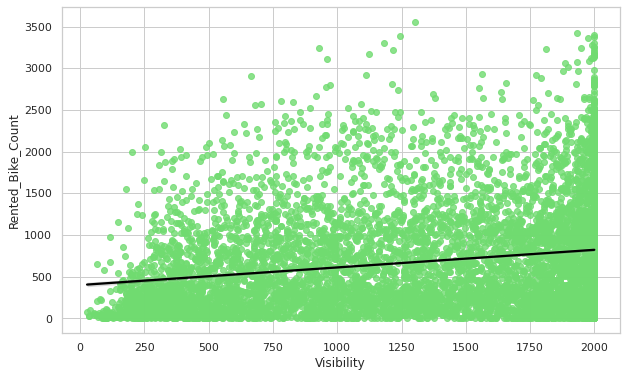

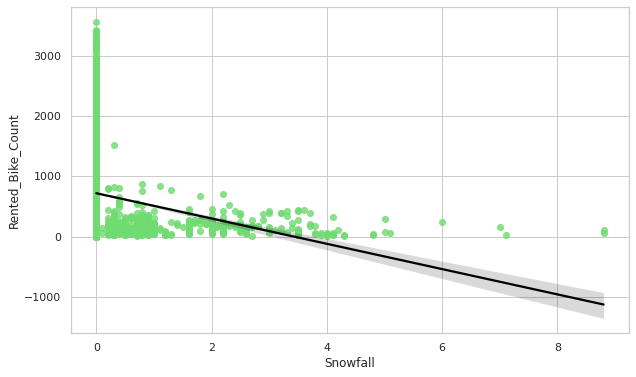

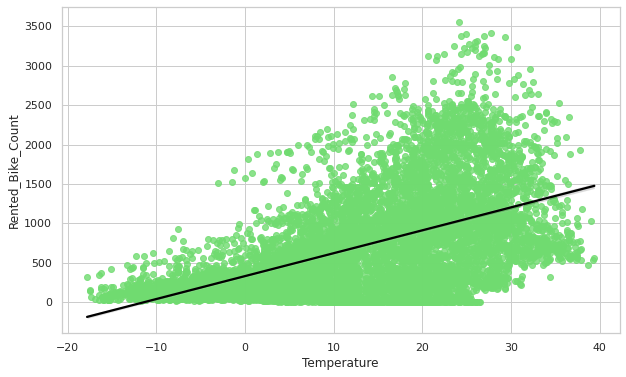

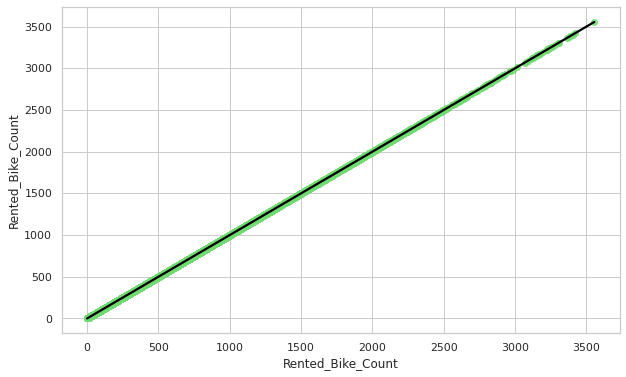

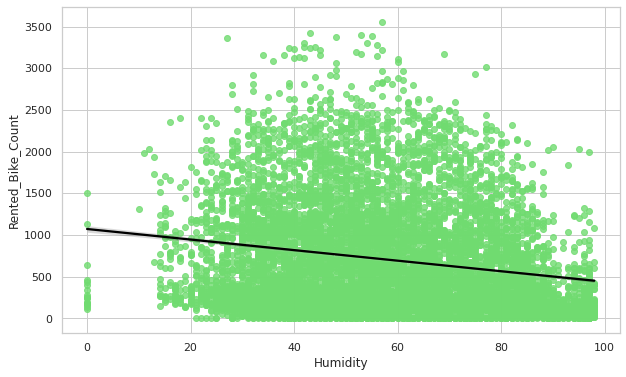

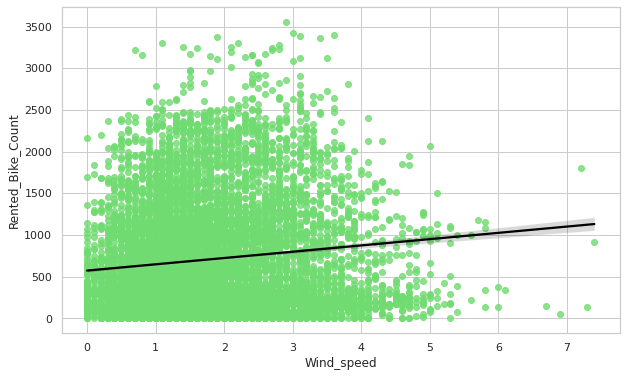

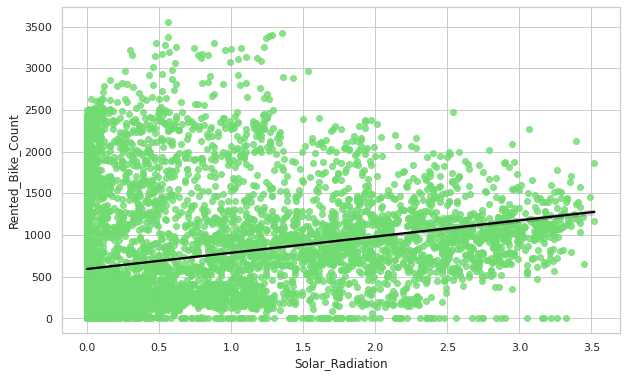

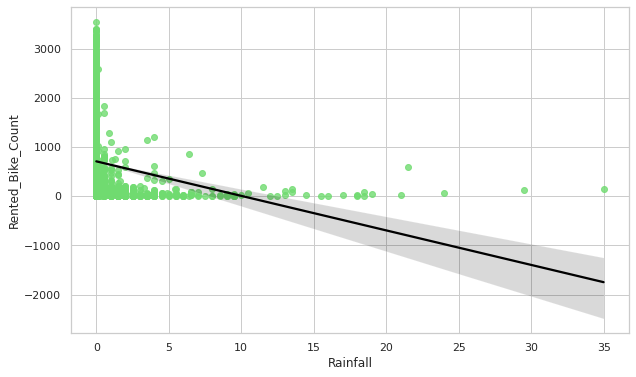

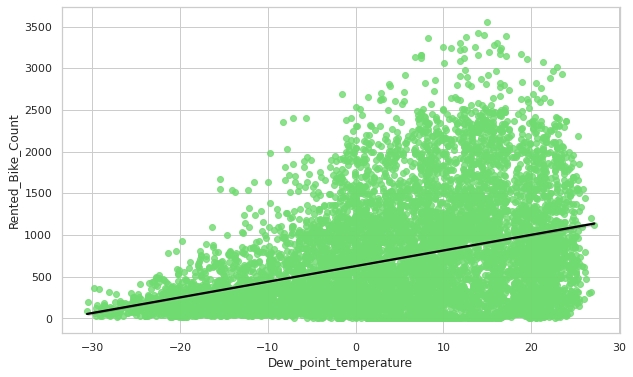

In [ ]:
# Chart - 13 visualization code
# Plotting the regression plot for all the numerical features

for col in num_feat:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col], y=df['Rented_Bike_Count'], scatter_kws={"color": '#70db70'}, line_kws={"color": 'black'})

##### 1. Why did you pick the specific chart?

By using a regression plot, we can determine whether there is a positive or negative correlation between the variables, as well as the strength of that correlation.

##### 2. What is/are the insight(s) found from the chart?

According to the above regression plots, Rainfall, Humidity, Wind Speed, Snowfall, and Solar Radiation have a negative relation with Rented Bike Count, while Dew Point Temperature, Temperature, and Visibility have a positive relation with Rented Bike Count.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the regression plots could potentially help create a positive business impact. For example, the negative relation between Rainfall, Humidity, Wind Speed, Snowfall, and Solar Radiation with Rented Bike Count could be used to anticipate a decrease in demand during unfavorable weather conditions and adjust inventory and staffing levels accordingly. On the other hand, the positive relation between Dew Point Temperature, Temperature, and Visibility with Rented Bike Count could be used to anticipate an increase in demand during favorable weather conditions and adjust inventory and staffing levels accordingly, potentially increasing revenue and customer satisfaction.

#### Chart - 14 - Correlation Heatmap

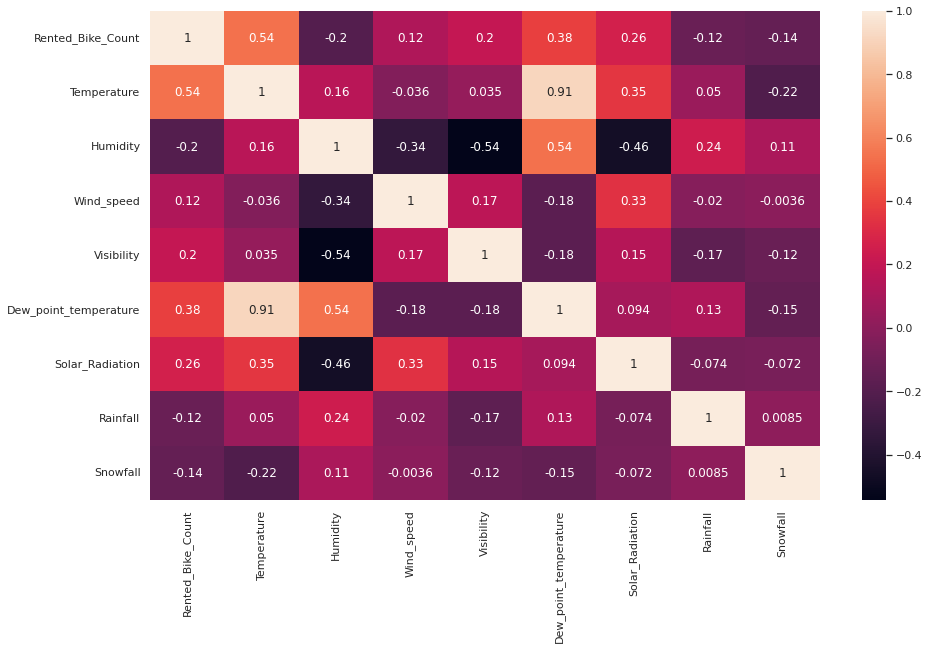

In [ ]:
# Correlation Heatmap visualization code

plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

To check the correlation between different variables.

##### 2. What is/are the insight(s) found from the chart?

'Dew Point Temperature' and 'Temperature' have a high correlation. The target variable 'Rented Bike Count' is also highly correlated with 'Temperature'.

#### Chart - 15 - Pair Plot 

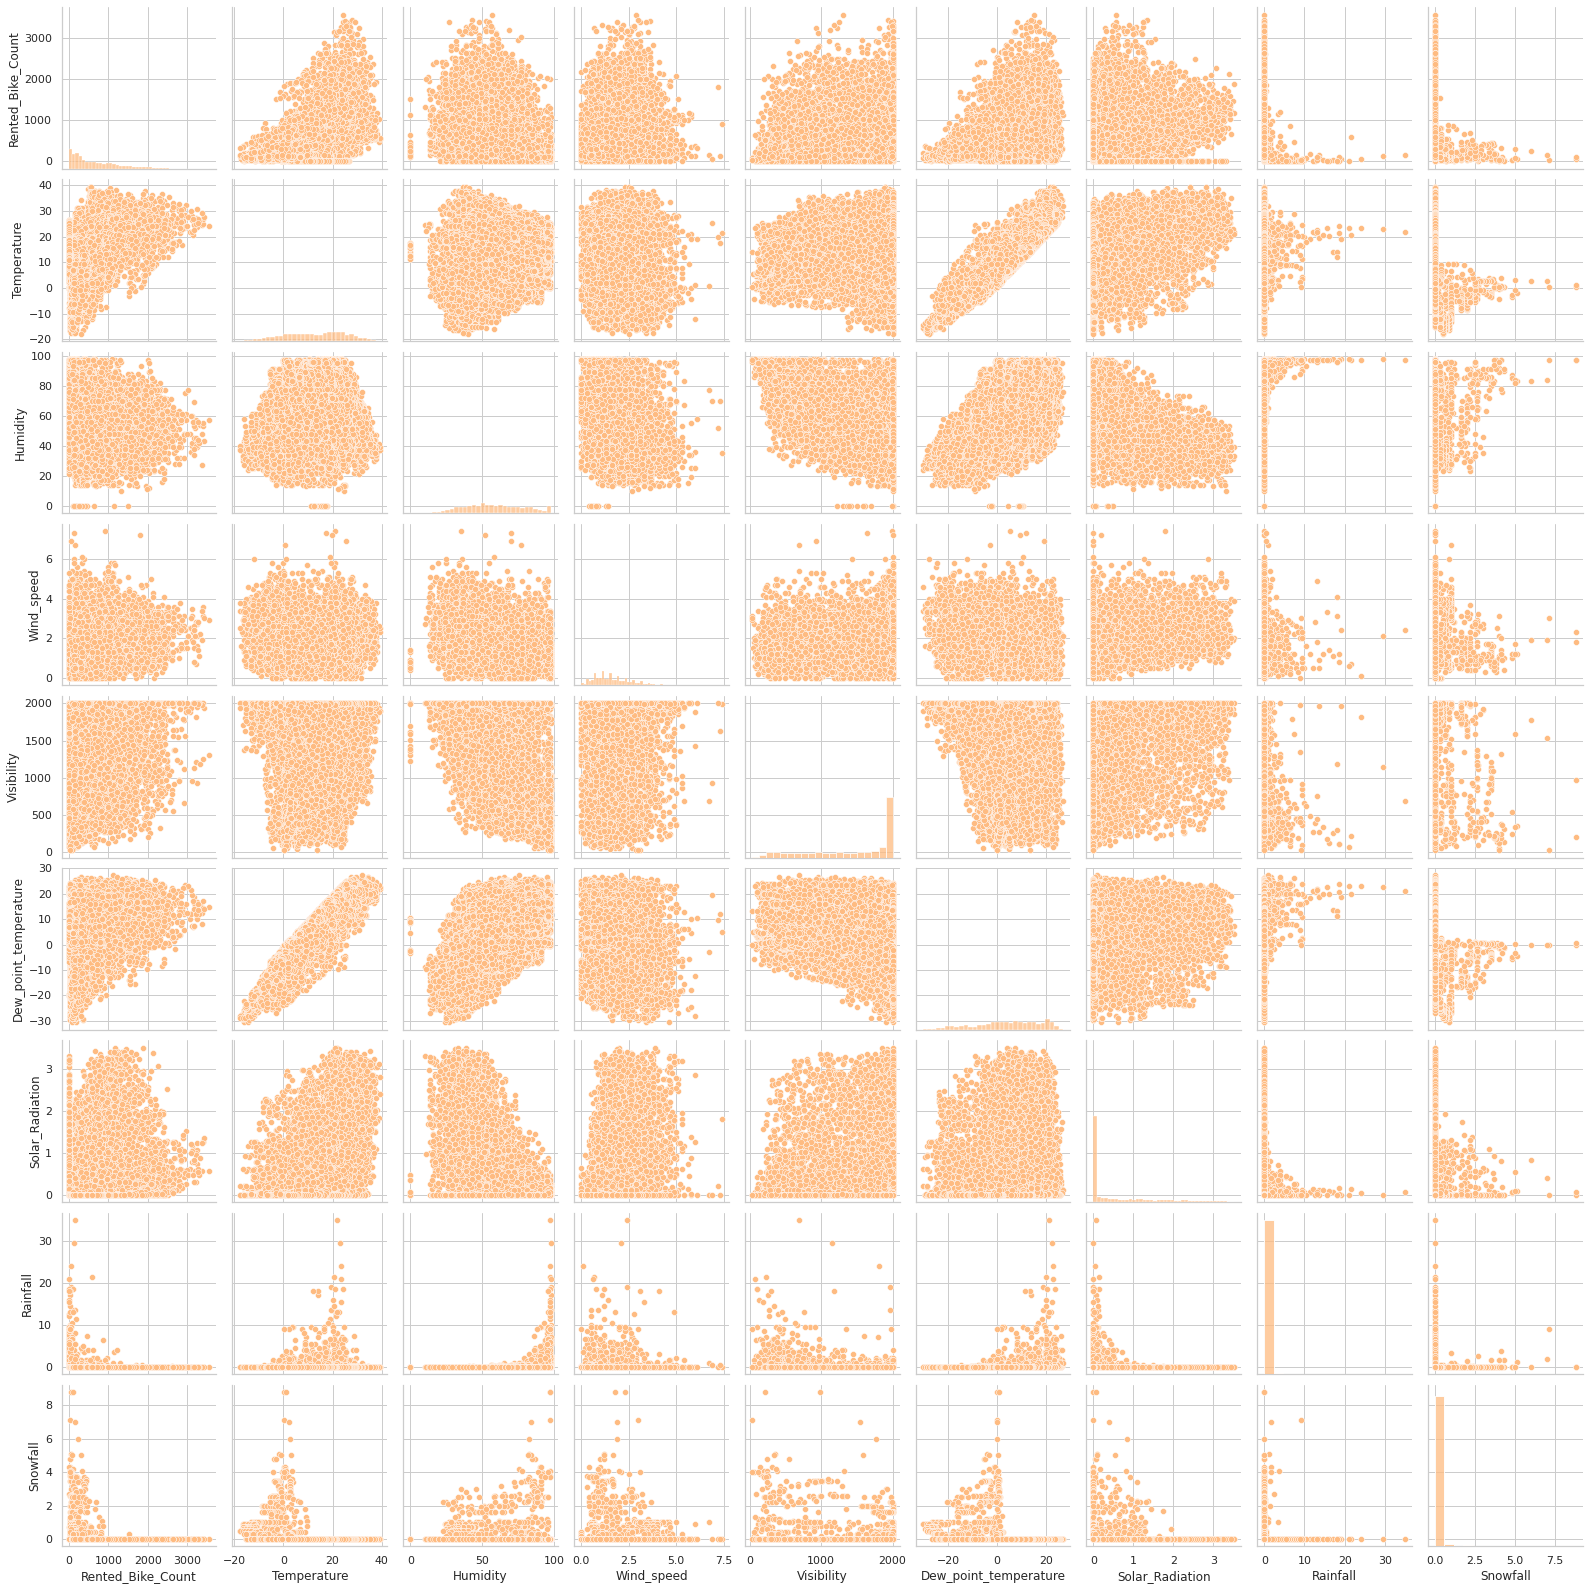

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

To visualize the pairwise relationships between multiple variables in a dataset, and are particularly useful for exploring high-dimensional data and identifying patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

The pair plot can show the correlations between different variables such as temperature, humidity, and windspeed, and the bike rental count. For example, it may reveal that the rental count is positively correlated with temperature, indicating that more people rent bikes on warmer days.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. The average number of rented bikes per month is greater than 350.

2. The average number of rented bikes on non-holiday days is greater than that on holidays.

3. There is a significant relationship between temperature and the number of rented bikes.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The average number of rented bikes per month is less than or equal to 350.

Alternative Hypothesis (H1): The average number of rented bikes per month is greater than 350.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Calculate the average rented bike per month
bike_rentals_by_month = df.groupby('month').mean()['Rented_Bike_Count']

# Conduct a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(bike_rentals_by_month, 350, alternative='greater')

# Print the t-statistic and p-value
print('t-statistic:', t_statistic)
print('p-value:', p_value)

# Final statement
if p_value < 0.05:
    print('Reject the null hypothesis. The average number of rented bikes per month is greater than 350')
else:
    print('Fail to reject the null hypothesis. The average number of rented bikes per month is less than or equal to 350')

t-statistic: 5.7871158801269145
p-value: 6.0781200110993016e-05
Reject the null hypothesis. The average number of rented bikes per month is greater than 350


##### Which statistical test have you done to obtain P-Value?

We used a one sample t-test to obtain a p-value.

##### Why did you choose the specific statistical test?

We want to determine whether the average number of rented bikes per month is greater than 350 or not.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (H0): The average number of rented bikes on non-holiday days is less than or equal to that on holidays.

Alternative hypothesis (H1): The average number of rented bikes on non-holiday days is greater than that on holidays.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Conduct t-test to compare mean Rented_Bike_Count between holidays and non-holidays
ttest_holiday = stats.ttest_ind(df[df['Holiday']=='Holiday']['Rented_Bike_Count'],
                                df[df['Holiday']=='No Holiday']['Rented_Bike_Count'])

# Print the t-statistic and p-value
print('t-statistic:', ttest_holiday.statistic)
print('p-value:', ttest_holiday.pvalue)

# Final statement
if ttest_holiday.pvalue < 0.05:
    print('Reject the null hypothesis. The average number of rented bikes on non-holiday days is greater than that on holidays.')
else:
    print('Fail to reject the null hypothesis. The average number of rented bikes on non-holiday days is less than or equal to that on holidays.')

t-statistic: -6.787434045415916
p-value: 1.2156443235024942e-11
Reject the null hypothesis. The average number of rented bikes on non-holiday days is greater than that on holidays.


##### Which statistical test have you done to obtain P-Value?

We used a two sample t-test to obtain a p-value.

##### Why did you choose the specific statistical test?

We want to determine whether the average number of rented bikes on non-holiday days is greater than that on holidays or not.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis(H0): There is no significant relationship between temperature and the number of rented bikes.
 
Alternative hypothesis(H1): There is a significant relationship between temperature and the number of rented bikes.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Conduct correlation test to assess the relationship between Hour and Rented_Bike_Count
corr_temp = stats.pearsonr(df['Temperature'], df['Rented_Bike_Count'])

# Print the correlation coefficient and p-value
print('Correlation coefficient:', corr_temp[0])
print('p-value:', corr_temp[1])

# Final statement
if corr_temp[1] < 0.05:
    print('Reject the null hypothesis. There is a significant relationship between temperature and the number of rented bikes.')
else:
    print('Fail to reject the null hypothesis. There is no significant relationship between temperature and the number of rented bikes')

Correlation coefficient: 0.5385581530139791
p-value: 0.0
Reject the null hypothesis. There is a significant relationship between temperature and the number of rented bikes.


##### Which statistical test have you done to obtain P-Value?

We used a Pearson's Correlation test to obtain a P-value.

##### Why did you choose the specific statistical test?

We want to determine whether there is a significant relationship between temperature and the number of rented bike or not.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
month                    0
weekdays_weekend         0
dtype: int64


Text(0.5, 1.0, ' Visualising Missing Values')

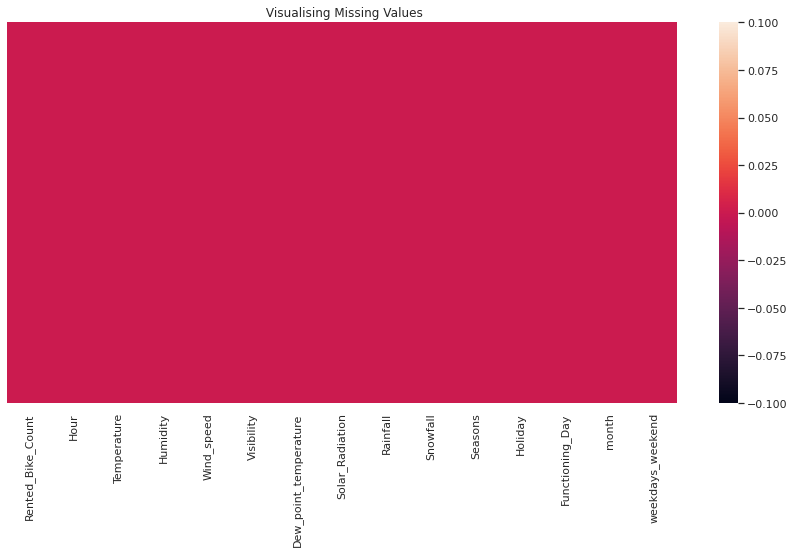

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(), annot=False, yticklabels=False)
plt.title(" Visualising Missing Values")

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.

### 2. Handling Outliers

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Rented_Bike_Count'),
  Text(1, 0, 'Temperature'),
  Text(2, 0, 'Humidity'),
  Text(3, 0, 'Wind_speed'),
  Text(4, 0, 'Visibility'),
  Text(5, 0, 'Dew_point_temperature'),
  Text(6, 0, 'Solar_Radiation'),
  Text(7, 0, 'Rainfall'),
  Text(8, 0, 'Snowfall')])

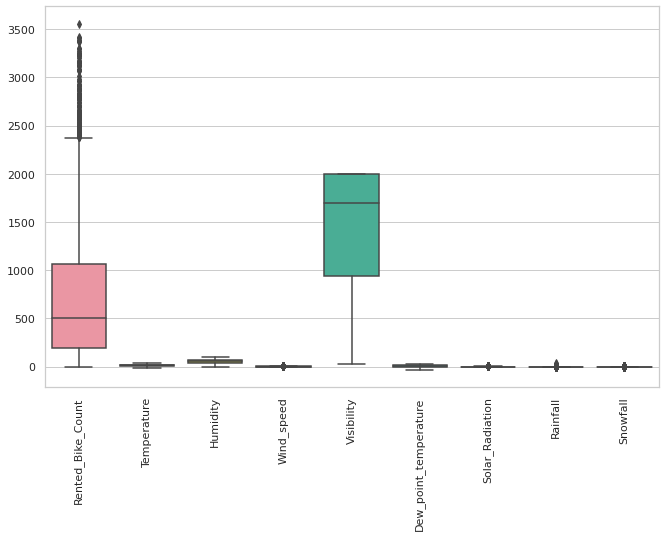

In [ ]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(11,7))
sns.boxplot(data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Rented_Bike_Count'),
  Text(1, 0, 'Temperature'),
  Text(2, 0, 'Humidity'),
  Text(3, 0, 'Wind_speed'),
  Text(4, 0, 'Visibility'),
  Text(5, 0, 'Dew_point_temperature'),
  Text(6, 0, 'Solar_Radiation'),
  Text(7, 0, 'Rainfall'),
  Text(8, 0, 'Snowfall')])

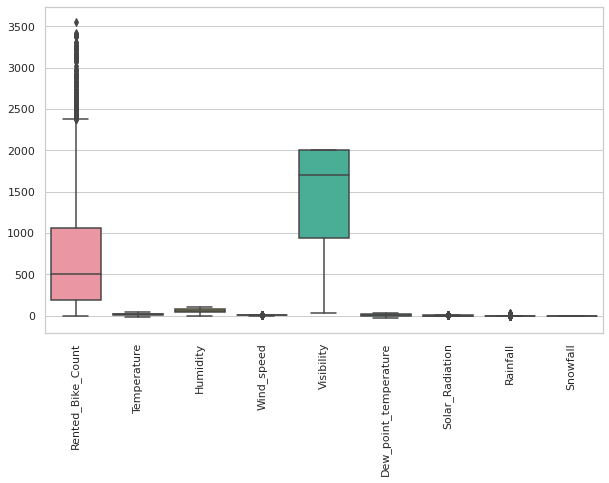

In [ ]:
# Handling outlier
outlier_col = ['Rented_Bike_Count', 'Wind_speed', 'Solar_Radiation', 'Rainfall', 'Snowfall']

# calculate interquartile range
for col in outlier_col:
  Q1= df[col].quantile(0.25)
  Q3= df[col].quantile(0.75)
  IQR= (Q3-Q1)
  cut_off = IQR * 1.5
  lower_bound, upper_bound = Q1 - cut_off, Q3 + cut_off

# Identify the outliers using the lower and upper bounds
outliers = (df[col] < lower_bound) | (df[col] > upper_bound)

# Handle the outliers by replacing them with the column's median value
df.loc[outliers, col] = df[col].median()
  
# Create a boxplot of the column
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)

##### What all outlier treatment techniques have you used and why did you use those techniques?

We used the interquartile range (IQR) technique to measure the spread of the middle half of the data and assess the variability, which indicates where most of the values lie. Larger values indicate that the central portion of the data is spread out further.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
df = pd.get_dummies(df, drop_first=True, sparse=True)
df.head()

Rented_Bike_Count  Temperature  Humidity  Wind_speed  Visibility  \
0                254         -5.2        37         2.2        2000   
1                204         -5.5        38         0.8        2000   
2                173         -6.0        39         1.0        2000   
3                107         -6.2        40         0.9        2000   
4                 78         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  Hour_1  ...  \
0                  -17.6              0.0       0.0       0.0       0  ...   
1                  -17.6              0.0       0.0       0.0       1  ...   
2                  -17.7              0.0       0.0       0.0       0  ...   
3                  -17.6              0.0       0.0       0.0       0  ...   
4                  -18.6              0.0       0.0       0.0       0  ...   

   month_4  month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
0        0        0        0        0        0        0         0         0   
1        0        0        0        0        0        0         0         0   
2        0        0        0        0        0        0         0         0   
3        0        0        0        0        0        0         0         0   
4        0        0        0        0        0        0         0         0   

   month_12  weekdays_weekend_1  
0         0                   0  
1         0                   0  
2         0                   0  
3         0                   0  
4         0                   0  

[5 rows x 49 columns]

#### What all categorical encoding techniques have you used & why did you use those techniques?

We used One-Hot encoding to convert categorical variables into a format that can be easily processed by algorithms. It creates a binary column for each category, where the column has a value of 1 if the category is present, and 0 if it is not. One-Hot encoding is a way to transform categorical variables into numerical variables without losing any valuable information.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# we already create new features like 'month' and 'weekdays_weekend'.

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
df.drop(columns=['Dew_point_temperature'], inplace=True)

In [ ]:
# Define the independent and dependent variable
x = df.drop('Rented_Bike_Count',axis=1)
y = df['Rented_Bike_Count']

# print the shape of X and Y
print(f"The Number of Rows and Columns in X is {x.shape} respectively.")
print(f"The Number of Rows and Columns in Y is {y.shape} respectively.")

The Number of Rows and Columns in X is (8760, 47) respectively.
The Number of Rows and Columns in Y is (8760,) respectively.


##### What all feature selection methods have you used  and why?

We used heatmap correlation to select important features because this technique showed that certain features are highly correlated with each other, which may result in overfitting of the model.

##### Which all features you found important and why?

'Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour', 'month','weekdays_weekend', 'Seasons', 'Holiday', 'Functioning_Day' are important features because the target feature 'Rented_Bike_Count' is dependent on all of them.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, we need to transform our target variable "Rented_Bike_Count", and to do so, we have used a square root transformation to convert the right-skewed distribution to a normal distribution.

<AxesSubplot:xlabel='Rented_Bike_Count', ylabel='Density'>

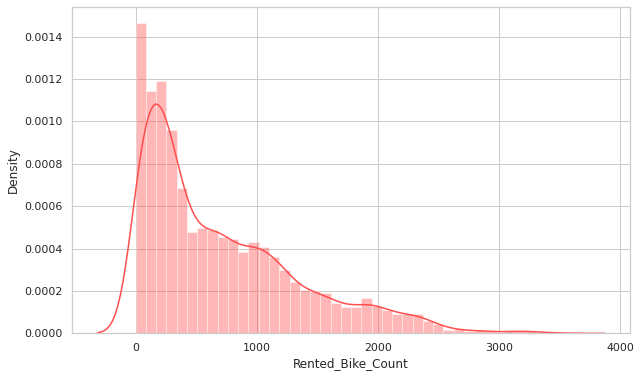

In [ ]:
# Transform Your data
# Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
sns.distplot(y, color = '#ff4d4d')

<AxesSubplot:xlabel='Rented_Bike_Count', ylabel='Density'>

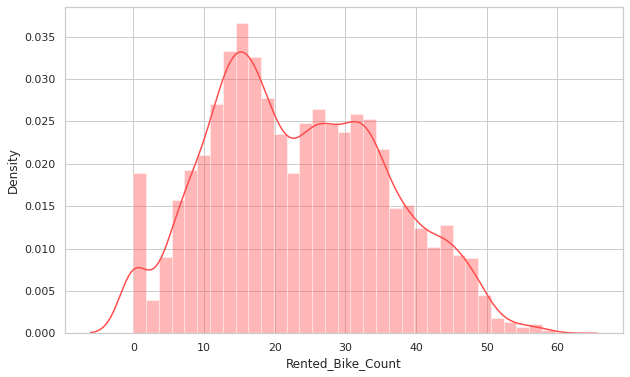

In [ ]:
# Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,6))
y = np.sqrt(y)
sns.distplot(y, color='#ff4d4d')

### 6. Data Scaling

In [ ]:
# Scaling your data
# Create the scaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(x)

# Scale the training and testing data
x_scaled = scaler.transform(x)

# Check the mean and standard deviation of the scaled training data
print("Mean of scaled training data:", x_scaled.mean(axis=0))
print("Standard deviation of scaled training data:", x_scaled.std(axis=0))

Mean of scaled training data: [ 9.73346213e-17  1.36268470e-16 -4.54228233e-17 -5.51562854e-17
  1.68713344e-16 -1.21668277e-18  0.00000000e+00  3.08733252e-17
  3.08733252e-17  3.08733252e-17  3.08733252e-17  3.08733252e-17
  3.08733252e-17  3.08733252e-17  3.07212399e-17  3.07212399e-17
  3.07212399e-17  3.07212399e-17  3.07212399e-17  3.07212399e-17
  3.07212399e-17  3.07212399e-17  2.78823134e-17  2.78823134e-17
  2.78823134e-17  2.78823134e-17  2.78823134e-17  2.78823134e-17
  2.78823134e-17  2.78823134e-17 -1.42757445e-16 -9.08456466e-17
  1.16801546e-16  6.16452602e-17 -4.38005796e-17 -2.59558990e-17
 -5.19117980e-17 -1.94669243e-17 -7.78676971e-17  0.00000000e+00
 -7.78676971e-17 -8.43566718e-17  3.56893612e-17 -5.84007728e-17
 -5.19117980e-17 -3.56893612e-17  3.16337519e-17]
Standard deviation of scaled training data: [1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


##### Which method have you used to scale you data and why?

We used the standardization feature scaling method to normalize the range of independent features in the data.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No. We have already dropped unnecessary and highly correlated columns and are now left with the important and necessary columns.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(6132, 47)
(2628, 47)


##### What data splitting ratio have you used and why? 

We have made the use of 70% and 30% Training and Testing data respectively.The data should be divided in such a way that neither of them is too high, which is more dependent on the ammount of data we have. If the data is too small, then no split will give satisfactory variance so we'll have to do cross-validation, but if the data is huge then it doesn’t really matter whether we choose an 70:30 split or a 80:20 split (indeed we may choose to use less training data as otherwise, it might be more computationally intensive).

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Since the target variable is a continuous variable, it cannot be categorized as balanced or imbalanced. Therefore, it is not relevant to discuss the balance of the dataset. The goal is to obtain a more normal distribution, which can improve the performance of regression models and other statistical analyses. This has been achieved by applying a square root transformation.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
lr = LinearRegression()

# Fit the Algorithm
lr.fit(x_train, y_train)

# Checking score 
print("Score on training set:", lr.score(x_train, y_train))

# Checking intercept
print("Intercept:", lr.intercept_)

# Checking Coefficent
print("Coefficients:", lr.coef_)

# Predict on the model
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

Score on training set: 0.7570666743615637
Intercept: 23.49094569771472
Coefficients: [ 5.66411908e+00 -2.86963890e+00 -1.63963336e-01  3.48625184e-01
  9.09607006e-01 -1.67390887e+00 -1.01355256e+13 -4.27821896e-01
 -1.01497505e+00 -1.48919346e+00 -1.90579740e+00 -1.80703479e+00
 -8.38461067e-01  4.37186639e-01  1.41883584e+00  1.56695474e-01
 -6.93342057e-01 -7.75505417e-01 -6.49586348e-01 -6.44533809e-01
 -7.10387324e-01 -4.55746422e-01  2.39622335e-02  7.32710986e-01
  2.03194795e+00  1.35026336e+00  1.21113346e+00  1.26205100e+00
  9.92034221e-01  2.55000768e-01 -1.12102488e+00 -1.41560042e+00
 -2.80826506e+00  6.81613078e-01  5.00257516e+00 -1.75064439e-01
  1.59148861e-01  1.01358093e-01  4.63747390e-01  1.20186796e+00
  7.90461706e-03 -1.70555911e-01  1.40891039e-01  6.71364418e-01
  3.31912951e-01  3.70616975e-01 -3.25410897e-01]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Calculating Performance Metrics for train data
print('Performance Metrics for train data')

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

# Calculating Performance Metrics for test data
print('\nPerformance Metrics for test data')

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

Performance Metrics for train data
MSE : 37.78888812800206
RMSE : 6.147266720096181
MAE : 4.66590840371471
R2 : 0.7570666743615637
Adjusted R2 : 0.7551899704981504

Performance Metrics for test data
MSE : 36.480551877132136
RMSE : 6.039913234238728
MAE : 4.664878059189033
R2 : 0.762493447222165
Adjusted R2 : 0.7581667774622588


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the linear regression model
ridge = Ridge()

# Define the hyperparameter grid to search over
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
              'solver': ['sag', 'saga', 'lbfgs'],
              'max_iter': [100, 500, 1000]}

# Perform grid search over the hyperparameter grid using 5-fold cross validation
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding mean squared error
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score : ", grid_search.best_score_)

# Fit the Algorithm
best_ridge = Ridge(**grid_search.best_params_)
best_ridge.fit(x_train, y_train)

# Predict on the model
y_pred_train_ridge = best_ridge.predict(x_train)
y_pred_test_ridge = best_ridge.predict(x_test)

Best hyperparameters:  {'alpha': 10.0, 'max_iter': 100, 'solver': 'sag'}
Best score :  0.751693253559156


In [ ]:
# Calculating Performance Metrics for train data
print('Performance Metrics for train data')

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_ridge))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

# Calculating Performance Metrics for test data
print('\nPerformance Metrics for test data')

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

Performance Metrics for train data
MSE : 37.78959307942506
RMSE : 6.1473240584359194
MAE : 4.666228487098371
R2 : 0.7570621424422062
Adjusted R2 : 0.7551854035688964

Performance Metrics for test data
MSE : 36.48955070592208
RMSE : 6.040658135163922
MAE : 4.665274482948808
R2 : 0.7624348603671159
Adjusted R2 : 0.7581071233272921


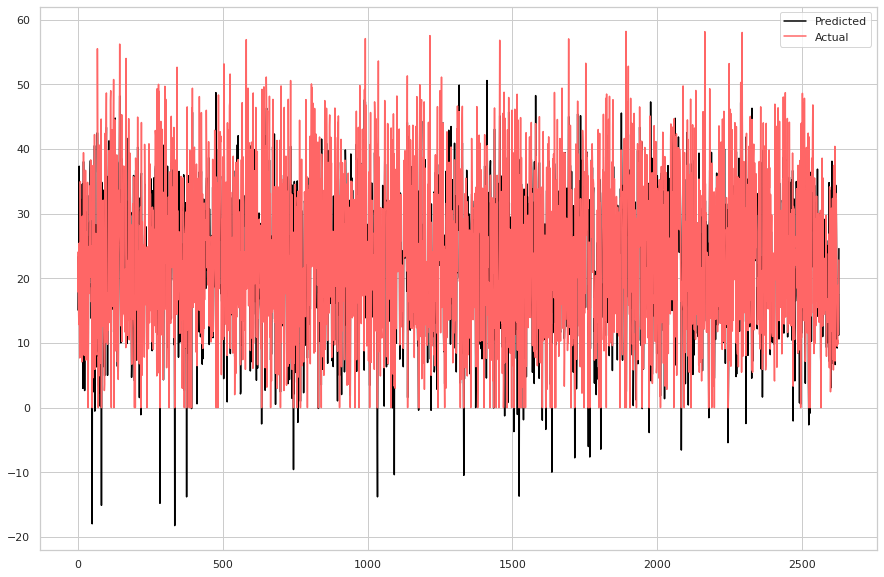

In [ ]:
# Plotting the figure

plt.figure(figsize=(15,10))
plt.plot(y_pred_test_ridge, color='k')
plt.plot(np.array(y_test), color='#ff6666')
plt.legend(["Predicted","Actual"])
plt.show()

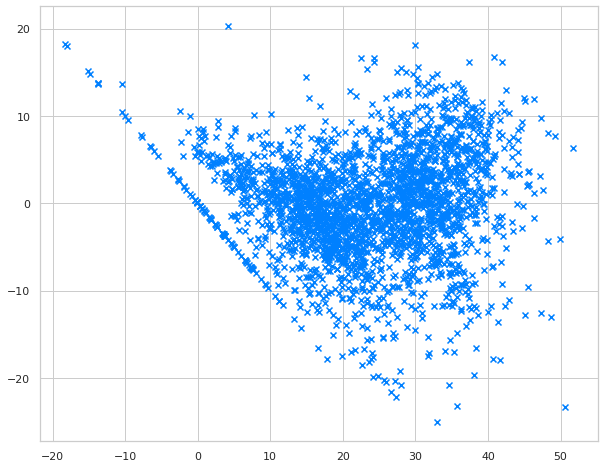

In [ ]:
# Checking Heteroscadacity

plt.figure(figsize=(10,8))
plt.scatter((y_pred_test_ridge), (y_test)-(y_pred_test_ridge), marker='x', color='#0080ff')

##### Which hyperparameter optimization technique have you used and why?

we used gridsearch CV hyperparameter optimization technique.It aims to find the best hyperparameters to improve the model's performance. Instead of manually searching for the optimal hyperparameters, GridSearchCV performs an exhaustive search over all the specified hyperparameters and their values. This can be time-consuming and expensive, especially if there are many hyperparameters involved. However, GridSearchCV also incorporates cross-validation, which is used during the model training process.

That's why we used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, we haven't seen any improvement. All the performance metrics, including MSE, RMSE, MAE, R2, and Adjusted R2, are the same as before.

### ML Model - 2

In [ ]:
# ML Model - 3 Implementation
rfr = RandomForestRegressor()

# Fit the Algorithm
rfr.fit(x_train, y_train)

# Predict on the model
y_pred_train_rfr = rfr.predict(x_train)
y_pred_test_rfr = rfr.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Calculating Performance Metrics for train data
print('Performance Metrics for train data')

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_rfr))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_rfr))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_rfr))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_rfr))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

# Calculating Performance Metrics for test data
print('\nPerformance Metrics for test data')

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_rfr))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_rfr))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_rfr))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_rfr))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

Performance Metrics for train data
MSE : 2.139907325592266
RMSE : 1.462842208029378
MAE : 0.9602462175607066
R2 : 0.9862431834087502
Adjusted R2 : 0.9861369095133213

Performance Metrics for test data
MSE : 15.737244980761135
RMSE : 3.967019659739681
MAE : 2.6169369529123716
R2 : 0.897542701157878
Adjusted R2 : 0.8956762309851727


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rfr = RandomForestRegressor()

# Define the hyperparameter grid to search over
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [20, 30, 40], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Fit the model with the best hyperparameters
best_rfr = RandomForestRegressor(**grid_search.best_params_)
best_rfr.fit(x_train, y_train)

# Predict on the model
y_pred_train_RFR = best_rfr.predict(x_train)
y_pred_test_RFR = best_rfr.predict(x_test)

Best hyperparameters: {'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score:  0.8978855958687655


In [ ]:
# Visualizing evaluation Metric Score chart

# Calculating Performance Metrics for train data
print('Performance Metrics for train data')

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_RFR))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_RFR))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_RFR))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_RFR))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

# Calculating Performance Metrics for test data
print('\nPerformance Metrics for test data')

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_RFR))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_RFR))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_RFR))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_RFR))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

Performance Metrics for train data
MSE : 2.062602083936989
RMSE : 1.4361762022596631
MAE : 0.9517237592426054
R2 : 0.9867401554122922
Adjusted R2 : 0.9866377207154444

Performance Metrics for test data
MSE : 15.763013302578145
RMSE : 3.9702661500934853
MAE : 2.6148811336286903
R2 : 0.8973749365553512
Adjusted R2 : 0.8955054102057781


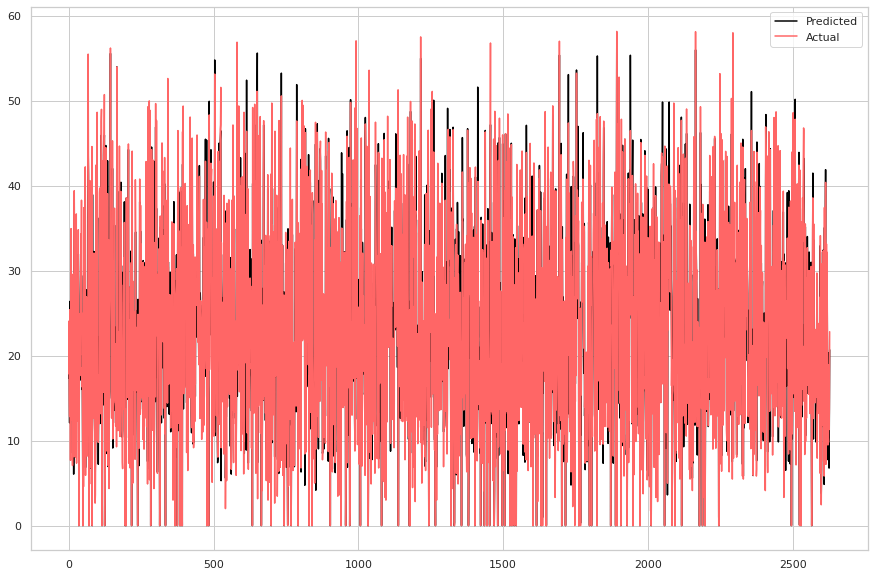

In [ ]:
# Plotting the figure

plt.figure(figsize=(15,10))
plt.plot(y_pred_test_RFR, color='k')
plt.plot(np.array(y_test), color='#ff6666')
plt.legend(["Predicted","Actual"])
plt.show()

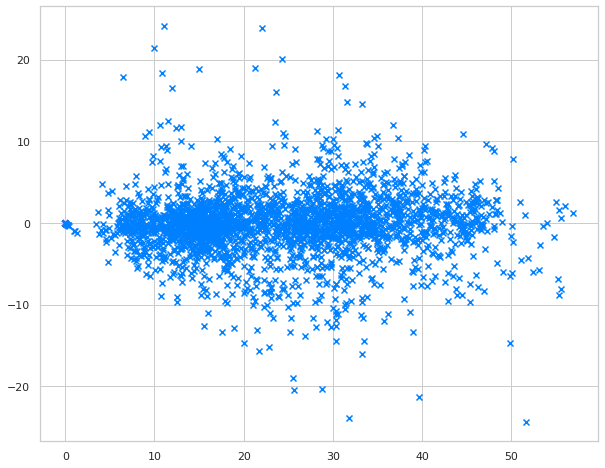

In [ ]:
# Checking Heteroscadacity

plt.figure(figsize=(10,8))
plt.scatter((y_pred_test_RFR), (y_test)-(y_pred_test_RFR), marker='x', color='#0080ff')

##### Which hyperparameter optimization technique have you used and why?

we used gridsearch CV hyperparameter optimization technique.It aims to find the best hyperparameters to improve the model's performance. Instead of manually searching for the optimal hyperparameters, GridSearchCV performs an exhaustive search over all the specified hyperparameters and their values. This can be time-consuming and expensive, especially if there are many hyperparameters involved. However, GridSearchCV also incorporates cross-validation, which is used during the model training process.

That's why we used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, we haven't seen any improvement. All the performance metrics, including MSE, RMSE, MAE, R2, and Adjusted R2, are the same as before but this model performed better in terms of MSE, MAE, and R2 scores on both the train and test datasets.

The model obtained an MSE of 2.16, MAE of 0.98, and R2 score of 0.98 on the train dataset, and an MSE of 15.70, MAE of 2.62, and R2 score of 0.89 on the test dataset. These results suggest that the model is performing well on the train dataset and generalizing reasonably well to the test dataset.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
xgb_r = XGBRegressor()

# Fit the Algorithm
xgb_r.fit(x_train, y_train)

# Predict on the model
y_pred_train_xgb = xgb_r.predict(x_train)
y_pred_test_xgb = xgb_r.predict(x_test)

[06:12:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Calculating Performance Metrics for train data
print('Performance Metrics for train data')

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_xgb))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_xgb))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_xgb))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_xgb))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

# Calculating Performance Metrics for test data
print('\nPerformance Metrics for test data')

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_xgb))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_xgb))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_xgb))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_xgb))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

Performance Metrics for train data
MSE : 21.22331009997805
RMSE : 4.6068763929563
MAE : 3.4750231701366268
R2 : 0.8635617622254694
Adjusted R2 : 0.8625077521703407

Performance Metrics for test data
MSE : 23.720637114186356
RMSE : 4.8703836721747455
MAE : 3.665168612141228
R2 : 0.8455668442281453
Adjusted R2 : 0.8427535270493558


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
xgb_r = XGBRegressor()

# Define the hyperparameter grid to search over
param_grid = {'n_estimators' : [50,80,100],
              'max_depth' : [4,6,8],
              'min_samples_split' : [50,100,150],
              'min_samples_leaf' : [40,50]}

# Perform grid search over the hyperparameter grid using 5-fold cross validation
grid_search = GridSearchCV(xgb_r, param_grid, cv = 5, verbose=2)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding mean squared error
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Fit the Algorithm
best_xgb_r= XGBRegressor(**grid_search.best_params_, random_state=42)
best_xgb_r.fit(x_train, y_train)

# Predict on the model
y_pred_train_XGB = best_xgb_r.predict(x_train)
y_pred_test_XGB = best_xgb_r.predict(x_test)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[06:12:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[06:12:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[06:12:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[06:12:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[06:12:51] WARNING: /works

In [ ]:
# Visualizing evaluation Metric Score chart

# Calculating Performance Metrics for train data
print('Performance Metrics for train data')

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_XGB))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_XGB))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_XGB))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_XGB))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

# Calculating Performance Metrics for test data
print('\nPerformance Metrics for test data')

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_XGB))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_XGB))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_XGB))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_XGB))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

Performance Metrics for train data
MSE : 4.1127625099672915
RMSE : 2.027994701661543
MAE : 1.3762442967482733
R2 : 0.9735602944780196
Adjusted R2 : 0.9733560429725079

Performance Metrics for test data
MSE : 14.322531393676023
RMSE : 3.7845120416872797
MAE : 2.594210421363677
R2 : 0.9067531908557374
Adjusted R2 : 0.905054508673652


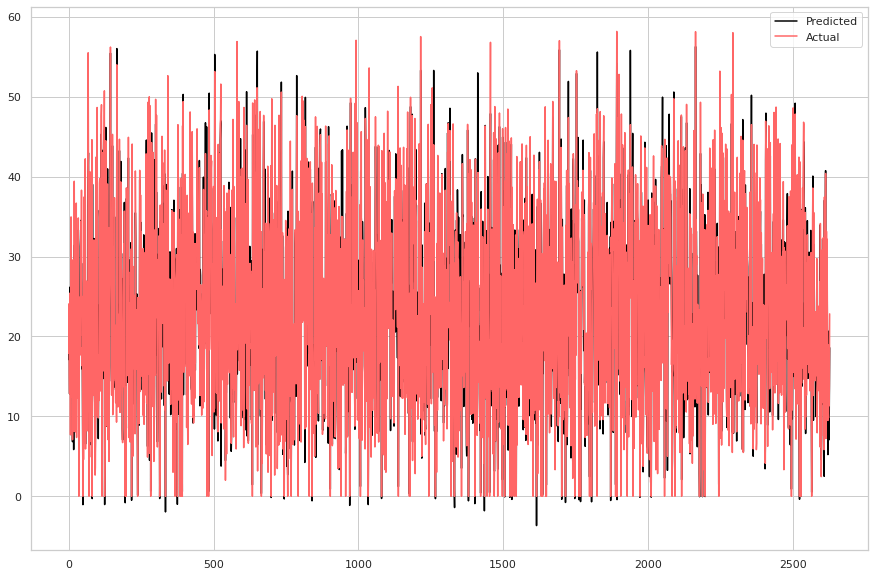

In [ ]:
# Plotting the figure

plt.figure(figsize=(15,10))
plt.plot(y_pred_test_XGB, color='k')
plt.plot(np.array(y_test), color='#ff6666')
plt.legend(["Predicted","Actual"])
plt.show()

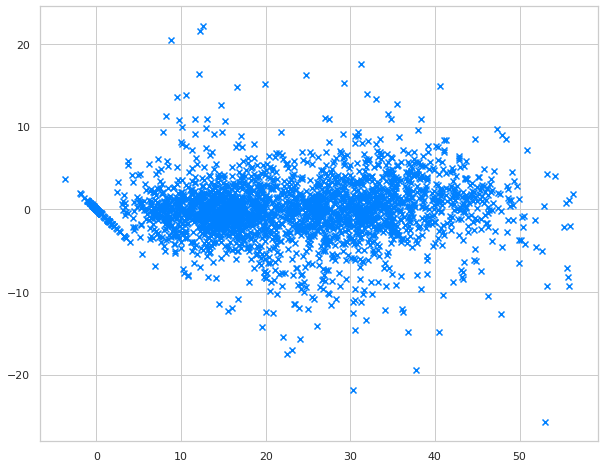

In [ ]:
# Checking Heteroscadacity

plt.figure(figsize=(10,8))
plt.scatter((y_pred_test_XGB), (y_test)-(y_pred_test_XGB), marker='x', color='#0080ff')

##### Which hyperparameter optimization technique have you used and why?

we used gridsearch CV hyperparameter optimization technique.It aims to find the best hyperparameters to improve the model's performance. Instead of manually searching for the optimal hyperparameters, GridSearchCV performs an exhaustive search over all the specified hyperparameters and their values. This can be time-consuming and expensive, especially if there are many hyperparameters involved. However, GridSearchCV also incorporates cross-validation, which is used during the model training process.

That's why we used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, we have seen a significant improvement. All the performance metrics, including MSE, RMSE, MAE, R2, and Adjusted R2, have improved after hyperparameter optimization.

The model obtained an MSE of 4.11, MAE of 1.37, and R2 score of 0.97 on the train dataset, and an MSE of 14.32, MAE of 2.59, and R2 score of 0.90 on the test dataset. These results suggest that the model is performing well on both the train dataset and the test dataset, indicating that the hyperparameter optimization has helped to improve the model's accuracy and generalization ability.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We consider Mean Absolute Error (MAE) as a metric for positive business impact because it measures the average of the absolute differences between the predicted and actual values. A lower MAE value indicates that the model is making more accurate predictions and is therefore better suited for business applications.

In other words, a lower MAE implies that the model's predictions are closer to the actual values, which can lead to better decision making and improved business outcomes. 

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have selected the hypertuned XGBoost model as our final prediction model because, while both the hypertuned random forest regressor and XGBoost models performed well on the training dataset, XGBoost performed better on the test dataset.

Although the random forest model performed slightly better than XGBoost on the training dataset, XGBoost demonstrated better generalization performance on the test dataset. This suggests that XGBoost is able to make more accurate predictions on unseen data, which is important for practical applications.

Therefore, we have chosen the XGBoost model as our final prediction model due to its superior performance on the test dataset.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I used the Hypertuned Optimized XGBoost model for my analysis, and used the SHAP (SHapley Additive exPlanations) tool for model explainability. After generating a summary plot using SHAP values and explainer, I found that the most important feature in predicting the target variable was "temperature."

SHAP is a tool for explaining the output of any machine learning model, and it can be used to generate summary plots that show the impact of each feature on the model's predictions. The summary plot produced using SHAP values and explainer provides a visual representation of the importance of each feature in the model.

In my case, the summary plot showed that the "temperature" feature had the greatest impact on the model's predictions. This means that changes in temperature have the strongest effect on the target variable. By using SHAP, I was able to identify the most important feature and gain a deeper understanding of how the model is making its predictions.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 9.6 MB/s eta 0:00:00


 93%|=================== | 2455/2628 [00:16<00:01]       

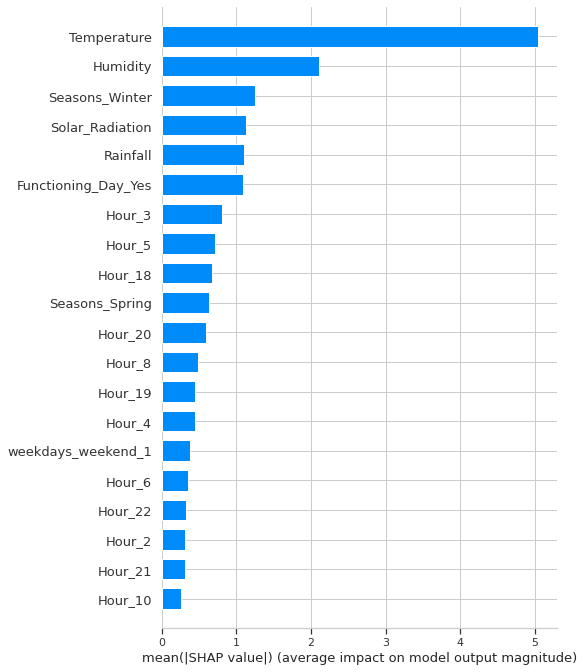

In [ ]:
# Feature importance of hypertuned XGBoost Regressor
!pip install shap
import shap

# Initialize the SHAP explainer with the best model and training data
explainer_best = shap.Explainer(best_xgb_r, x_train)

# Compute the SHAP values for the test set using the best model
shap_values_best = explainer_best(x_test)

# Convert x_train to a DataFrame with named columns
feature_names = list(df.columns[1:])
x_train_df = pd.DataFrame(x_train, columns=feature_names)

# Plot the summary plot of SHAP values for the best model
shap.summary_plot(shap_values_best, x_test, feature_names=feature_names, plot_type='bar')

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

There is a clear seasonal trend in bike rental demand, with higher demand during the summer months and lower demand during the winter months.

Hourly bike rental demand shows a bimodal distribution, with peaks during the morning and evening rush hours.

From April to August and in October, there are more bike rentals (more than 750 bike rentals per hour).

During non-holidays (>700 rented bike per hour), there are more bike rentals compared to holidays (approximately 500 rented bikes per hour). However, it should be noted that the number of people who prefer to rent bikes on holidays is not too low.

Rental bikes are more popular on functioning days, while on non-functioning days, rental bike activity is minimal or close to zero.

Weekdays have higher demand than weekends, with Monday through Friday showing the highest demand. However, weekends do not have significantly lower demand.

Temperature and humidity have a positive correlation with bike rental demand, while windspeed has a negative correlation.

The linear regression model performs well in predicting bike rental demand, with a Mean Absolute Error (MAE) value of 4.66.

The random forest model performs slightly better than the linear regression model, with a MAE value of 2.62.

The XGBoost model performs the best among the three models tested, with a MAE value of 2.59.

Furthermore, the R2 scores of linear regression, random forest, and XGBoost are 0.76, 0.89, and 0.90, respectively. These scores indicate that the models are good fits for test dataset.

No overfitting was observed in either model.

The feature importance analysis in the XGBoost model shows that temperature and humidity are the most important predictors of bike rental demand.

The final model, XGBoost, can be used to predict hourly bike rental demand with a reasonable level of accuracy, which can be useful for bike rental companies in managing inventory and planning for demand.


The results of the project can inform business strategy, such as identifying the most profitable times to operate bike rental stations.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***